In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

In [23]:
# Sample Generating(N=500)
# Model : Y = 0.5X + N_Y
X = np.linspace(-1, 2, 500)
N_Y = random.uniform(0.0,1.0,size=500)
Y = 0.5*X + N_Y
data = pd.DataFrame({"X" : X, 'y' : Y})
data

,X,y
0,-1.000000,-0.353462
1,-0.993988,0.326545
2,-0.987976,0.187002
3,-0.981964,0.471288
4,-0.975952,0.501703
...,...,...
495,1.975952,1.492752
496,1.981964,1.123072
497,1.987976,1.072553
498,1.993988,1.008278


In [60]:
# Regression Y on X
from statsmodels.formula.api import ols

model = ols("Y ~ X", data = data).fit()
print(model.summary()) # result : Y = 0.5105X + 0.5003 with p-value < 10e-3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.35e-125
Time:                        20:00:47   Log-Likelihood:                -100.93
No. Observations:                 500   AIC:                             205.9
Df Residuals:                     498   BIC:                             214.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4968      0.015     32.440      0.0

In [91]:
# Pearson correlation Test
from scipy.stats import pearsonr
beta = model.params.X # coef of model
intercept = model.params.Intercept # intercept of model
residuals = Y - (beta * X + intercept) # residual of model(non-normalized)

r_1 = pearsonr(X, residuals)[0] # correlation < 10e-16 with p-value > 0.99
pearsonr(X, residuals)


(7.233796894823286e-16, 0.9999999999997792)

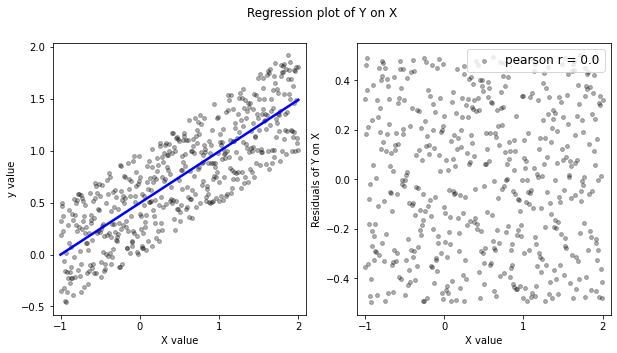

In [86]:
# Plot for Reg Y on X


fig, axes = plt.subplots(1,2, figsize = (10,5))
for ax in axes:
    ax.set(xlim = (-1.1,2.1))
    ax.set_xticks(range(-1,3))
axes[0].scatter(data.X,data.y, c = 'black', alpha=0.3, s=15)
axes[0].plot([-1,2],[intercept-beta, 2*beta+intercept], c = 'blue', linewidth = 2.5) # draw fitted line from x = -1 to x = 2
axes[0].set(xlabel='X value', ylabel='y value')
axes[1].scatter(data.X, residuals, c = 'black', alpha=0.3, s=15, label = f'pearson r = {r_1.round(4)}')
axes[1].set(xlabel='X value', ylabel = 'Residuals of Y on X')
axes[1].legend(loc = 'upper right', fontsize = 12)
plt.suptitle("Regression plot of Y on X")
plt.savefig('plots/RESIT_plot1.png', transparent = False, facecolor = 'white')

In [64]:
# Case (2) : Regression of X on Y
model_2 = ols('X ~ y', data = data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1059.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.35e-125
Time:                        20:02:18   Log-Likelihood:                -353.58
No. Observations:                 500   AIC:                             711.2
Df Residuals:                     498   BIC:                             719.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5191      0.038    -13.565      0.0

In [93]:
# Pearson correlation Test
beta_2 = model_2.params.y
intercept_2 = model_2.params.Intercept
residuals_X = X - (beta * Y + intercept)

r_2 = pearsonr(residuals_X, Y)[0] # 0.68 with p-value < 10e-69
pearsonr(residuals_X, Y)

(0.6799986233284856, 4.0209402664686417e-69)

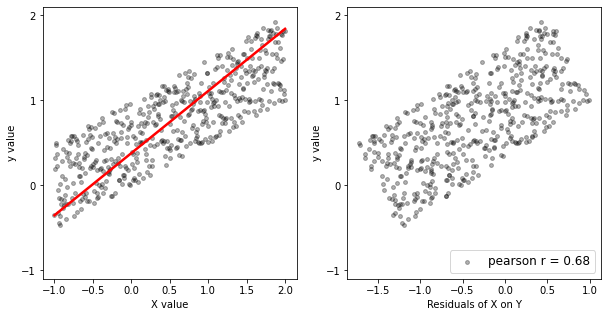

In [94]:
# Plot for Reg X on Y

fig, axes = plt.subplots(1,2, figsize = (10,5))
for ax in axes:
    ax.set(ylim = (-1.1,2.1))
    ax.set_yticks(range(-1,3))
axes[0].scatter(data.X,data.y, c = 'black', alpha=0.3, s=15)
axes[0].plot([-1,2],[(-1-intercept_2)/beta_2,(2-intercept_2)/beta_2], c = 'red', linewidth = 2.5) # draw fitted line from x = -1 to x = 2(inverse-calculated)
axes[0].set(xlabel='X value', ylabel='y value')

axes[1].scatter(residuals_X, data.y, c = 'black', alpha=0.3, s=15, label = f'pearson r = {r_2.round(4)}')
axes[1].set(xlabel='Residuals of X on Y', ylabel = 'y value')
axes[1].legend(loc = 'lower right', fontsize = 12)
plt.savefig('plots/RESIT_plot2.png', transparent = False, facecolor = 'white')